## Basic Circuit implementation

See `qiskit.circuit.library` [document](https://docs.quantum.ibm.com/api/qiskit/circuit_library).

In [1]:
!pip install qiskit

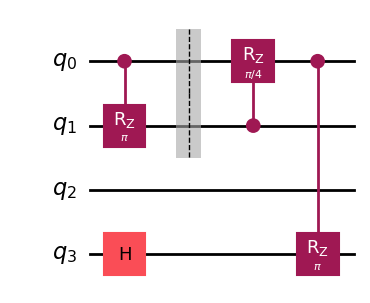

In [7]:
from qiskit.circuit.library import CRZGate
import numpy as np
crz_t1 = CRZGate(np.pi)

qc= QuantumCircuit(4)
qc.append(crz_t1, [0, 1])

qc.barrier([0,1])

qc.append(CRZGate(np.pi/4), [1, 0])
qc.h(3)
qc.append(crz_t1, [0, 3])
qc.draw("mpl")


In [5]:
# Get basic gates
from qiskit.circuit.library import HGate, CXGate
from qiskit import QuantumCircuit

HG = HGate()

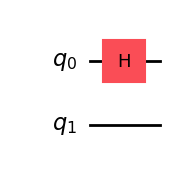

In [6]:
qc = QuantumCircuit(2) # number of qubits
qc.append(HG, [0])
qc.draw('mpl')

In [4]:
qc.draw()

┌───┐
q_0: ┤ H ├
     └───┘
q_1: ─────

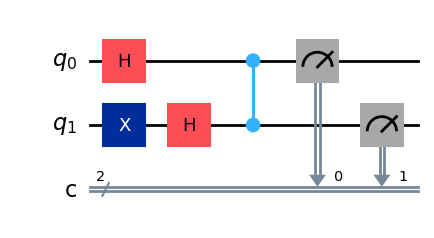

In [16]:
# Some standard gates inherited in circuit.
qc = QuantumCircuit(2, 2) # 2 qubit, 2 classic bit
qc.x(1)
qc.h(range(2))
qc.cz(0, 1)
qc.measure([0,1], [0, 1])
qc.draw('mpl')

### Gate and matrix

In [37]:
from qiskit.circuit.library import (
    XGate, YGate, ZGate,
    TGate, SGate, HGate, 
    RXGate, RZGate, RYGate,
    CXGate, CZGate)
X = XGate()
Y = YGate()
Z = ZGate()
T = TGate()
S = SGate()
H = HGate()

## Matrix representation

The all gate on the circuit and also the ciruit itself a giant unitary matrix.
We can transform the gate into matrix form and the given matrix into the gate.

In [38]:
# numpy
# Each gate in Qiskit library are 
# itself compatible with numpy routine.
np.matrix(X), np.matrix(T)

(matrix([[0.+0.j, 1.+0.j],
         [1.+0.j, 0.+0.j]]),
 matrix([[1.        +0.j        , 0.        +0.j        ],
         [0.        +0.j        , 0.70710678+0.70710678j]]))

In [39]:
# Gate subroutine
# Qiskit provides matrix representation which is embeded in the Gate class.
X.to_matrix() 

array([[0.+0.j, 1.+0.j],
       [1.+0.j, 0.+0.j]])

In [40]:
H.to_matrix()

array([[ 0.70710678+0.j,  0.70710678+0.j],
       [ 0.70710678+0.j, -0.70710678+0.j]])

In [41]:
(1/np.sqrt(2))*np.matrix([
    [1,1],
    [1,-1]
])

matrix([[ 0.70710678,  0.70710678],
        [ 0.70710678, -0.70710678]])

### Gate power

Single gate can be decomposed to several gates

$$U = (U^{1/n})^n$$

The $n$ could be real number. It does not have to be integer in all case.
Qiskit provides the `power()` routine to decompose the single gate and reversely, the method can compose the several iterative gate.

In [29]:
X.to_matrix()

array([[0.+0.j, 1.+0.j],
       [1.+0.j, 0.+0.j]])

In [30]:
X1_3 = X.power(1/3).to_matrix() # (X)^{1/3}
X1_3@X1_3@X1_3

array([[-9.33118602e-16-2.12152338e-16j,  1.00000000e+00-1.20914569e-16j],
       [ 1.00000000e+00-1.03718708e-16j, -6.44407220e-16+4.09030040e-16j]])

In [31]:
X3 = X.power(3).to_matrix() # X^3, it must be X
X3

array([[0.+0.j, 1.+0.j],
       [1.+0.j, 0.+0.j]])

## Circuit to gate

As we first mentioned, a circuit itself a giant uniatry gate.
Qiskit provides a routine to convert the circuit into the single gate.

For example, let's implement a tensor product of several matrix with circuit.

In [66]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import HGate, XGate
from qiskit.quantum_info import Operator # For the ciruit to matrix
from scipy.linalg import kron as tensor_product

In [46]:
h = HGate().to_matrix()
x = XGate().to_matrix()

In [47]:
tensor_product(h, x)

array([[ 0.        +0.j,  0.70710678+0.j,  0.        +0.j,
         0.70710678+0.j],
       [ 0.70710678+0.j,  0.        +0.j,  0.70710678+0.j,
         0.        +0.j],
       [ 0.        +0.j,  0.70710678+0.j, -0.        +0.j,
        -0.70710678+0.j],
       [ 0.70710678+0.j,  0.        +0.j, -0.70710678+0.j,
        -0.        +0.j]])

In [64]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ X ├
     └───┘

In [68]:
# The circuit has a routine 'to_matrix'.

Operator(qc).to_matrix()

array([[ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
         0.70710678+0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
        -0.70710678+0.j],
       [ 0.70710678+0.j,  0.70710678+0.j,  0.        +0.j,
         0.        +0.j],
       [ 0.70710678+0.j, -0.70710678+0.j,  0.        +0.j,
         0.        +0.j]])

### Tensor Product

## Hamiltonian

In [23]:
from qiskit.circuit.library import HamiltonianGate
import numpy as np
from scipy.linalg import expm

In [21]:
H = np.matrix([
    [0, 1, 4, 7],
    [1, 0, 5, 3],
    [4, 5, 0, 1],
    [7, 3, 1, 0]
    ], dtype=complex)
t = 0.2
hgate = HamiltonianGate(H, t)

In [25]:
# Scipy matrix exponential.
expm(-1j*H*t)

array([[ 0.04380594+0.12558268j, -0.56921777-0.05412968j,
        -0.13590766-0.28229904j, -0.03772989-0.74550919j],
       [-0.56921777-0.05412968j,  0.48049057+0.10873281j,
        -0.05412736-0.61527073j, -0.14470045-0.16715571j],
       [-0.13590766-0.28229904j, -0.05412736-0.61527073j,
         0.38177938+0.12137779j, -0.59736931-0.05486675j],
       [-0.03772989-0.74550919j, -0.14470045-0.16715571j,
        -0.59736931-0.05486675j,  0.14246547+0.11728763j]])

In [26]:
hgate.to_matrix()

array([[ 0.04380594+0.12558268j, -0.56921777-0.05412968j,
        -0.13590766-0.28229904j, -0.03772989-0.74550919j],
       [-0.56921777-0.05412968j,  0.48049057+0.10873281j,
        -0.05412736-0.61527073j, -0.14470045-0.16715571j],
       [-0.13590766-0.28229904j, -0.05412736-0.61527073j,
         0.38177938+0.12137779j, -0.59736931-0.05486675j],
       [-0.03772989-0.74550919j, -0.14470045-0.16715571j,
        -0.59736931-0.05486675j,  0.14246547+0.11728763j]])

from cir

## Measurement

In [ ]:
from qiskit import execute, Aer, transpile
aer_state_sim = Aer.get_backend('statevector_simulator') # Simulator

In [ ]:
job = execute(qc, aer_state_sim) 
psi = job.result().get_statevector(qc) # Get state vector

$$\langle \psi | H | \psi \rangle$$

## Drawing a circuit

See details in `Visualize circuits`.


In [69]:
from qiskit import QuantumCircuit

In [71]:
# Prepare circuit
qc = QuantumCircuit(3)
qc.h([0, 1])
qc.x([2])
qc.rx(0.5, [0])
qc.cx(0, 1)
qc.measure_all()

In [72]:
# ASCII code
qc.draw()

┌───┐┌─────────┐      ░ ┌─┐      
   q_0: ┤ H ├┤ Rx(0.5) ├──■───░─┤M├──────
        ├───┤└─────────┘┌─┴─┐ ░ └╥┘┌─┐   
   q_1: ┤ H ├───────────┤ X ├─░──╫─┤M├───
        ├───┤           └───┘ ░  ║ └╥┘┌─┐
   q_2: ┤ X ├─────────────────░──╫──╫─┤M├
        └───┘                 ░  ║  ║ └╥┘
meas: 3/═════════════════════════╩══╩══╩═
                                 0  1  2

In [73]:
print(qc) #QC itself has a string representation.

        ┌───┐┌─────────┐      ░ ┌─┐      
   q_0: ┤ H ├┤ Rx(0.5) ├──■───░─┤M├──────
        ├───┤└─────────┘┌─┴─┐ ░ └╥┘┌─┐   
   q_1: ┤ H ├───────────┤ X ├─░──╫─┤M├───
        ├───┤           └───┘ ░  ║ └╥┘┌─┐
   q_2: ┤ X ├─────────────────░──╫──╫─┤M├
        └───┘                 ░  ║  ║ └╥┘
meas: 3/═════════════════════════╩══╩══╩═
                                 0  1  2 


### Matplotlib

In [87]:
import matplotlib.pyplot as plt
from IPython.display import display

In [88]:
fig = qc.draw(output="mpl") # returen a matplotlib figure object.

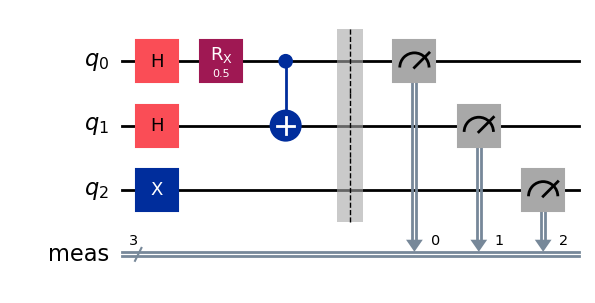

In [86]:
display(fig)

In [89]:
# save to file
fig.savefig("quantum_circuit.pdf", backend="pgf")

You can set various style of the gate, line, measurement in the drawing.

### Latex 

The renderer requires latex program in the system.
You can install the next latex packages.

- TexLive
- MiKTeX
- TinyTex

In addition, the poppler library is required for renderer.

In [ ]:
# Latex as lenderer
# qc.draw(output="latex")